In [1]:
from h2_gym.envs import ShippingEnv
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

In [2]:
environment = ShippingEnv()
with environment as env:
    env['vector'] = 'NH3'
    env['fast']['data_folder'] = "shipping_v1"
    env['fast']['planning_model'] = "NH3-Chile.yml"
    env['weather_data']['weather_file'] = 'CoastalChile_15-20_Wind.csv'
    pass


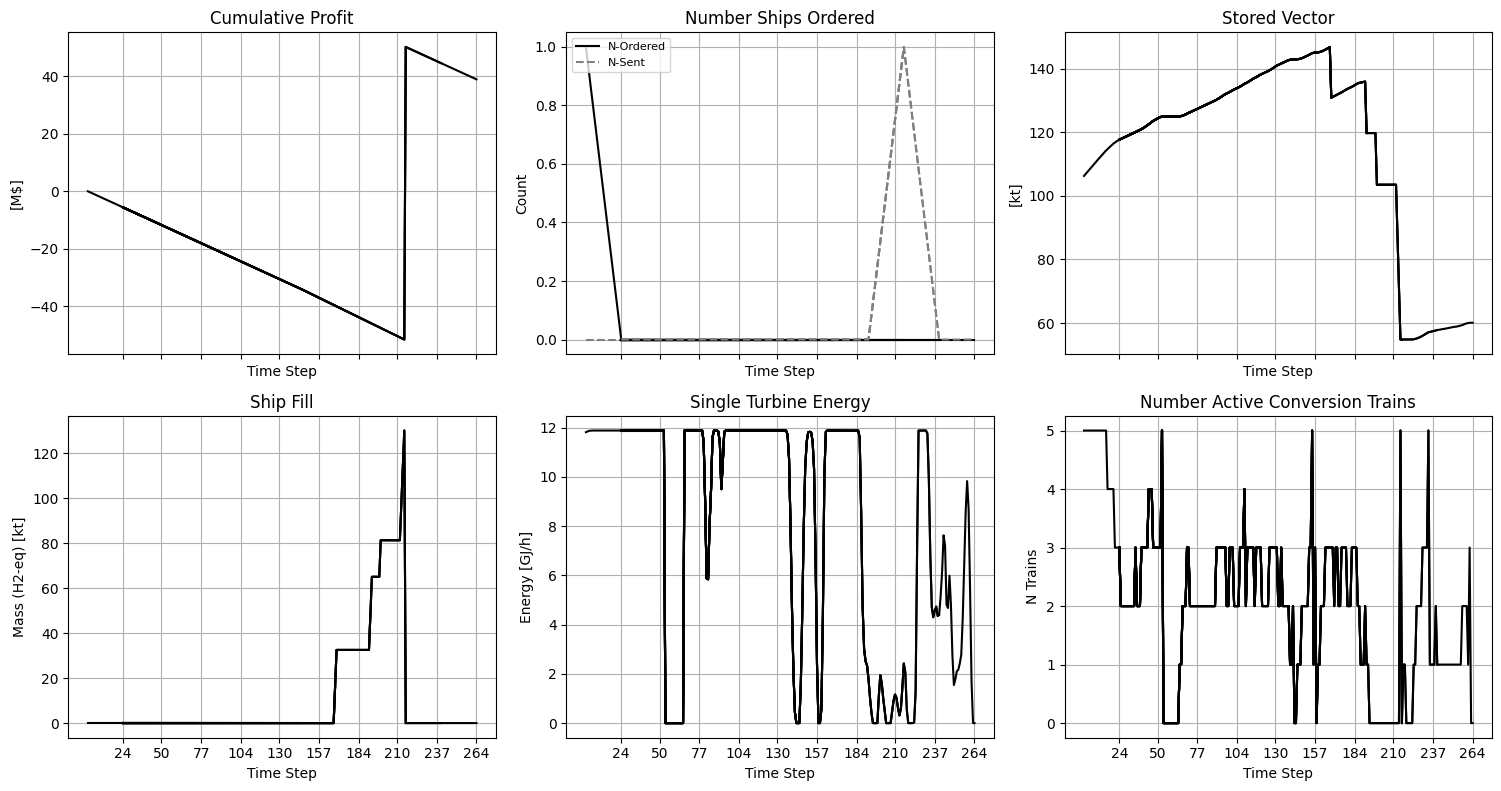

start_values['n_ship_ordered',0] = -0.0
start_values['n_ship_sent',0] = 0.0
start_values['waiting_ships',0] = 0.0
start_values['cumulative_charge',0] = 0.0


In [ ]:
%matplotlib notebook
fig = environment.render()
plt.show()

schedule = [0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
            ,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1, 0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,]
index = [0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240, 264, 288, 312, 336, 360, 384, 408, 432, 456, 480, 504, 528, 552, 576, 600, 624, 648, 672, 696, 720, 744, 768, 792, 816, 840, 864, 888, 912, 936, 960, 984, 1008, 1032, 1056, 1080, 1104, 1128, 1152, 1176, 1200, 1224, 1248, 1272, 1296, 1320, 1344, 1368, 1392, 1416, 1440
         , 1464, 1488, 1512, 1536, 1560, 1584, 1608, 1632, 1656, 1680, 1704, 1728, 1752, 1776, 1800, 1824, 1848, 1872, 1896, 1920, 1944, 1968, 1992, 2016, 2040, 2064, 2088, 2112, 2136, 2160, 2184, 2208, 2232, 2256, 2280, 2304, 2328, 2352, 2376, 2400]

action = {}
environment.step(action)

for i in range(len(index)):
    action[index[i]] = schedule[i]

for fig in environment.step(action, True):
    clear_output(wait=True)
    display(fig)
    plt.pause(0.1)
    pass


In [ ]:
for i in range(24,25, 24):
    print(i)

24


In [ ]:
r = 0.06

